# Use a convolutional neural network
## Convolutional neural networks

이전 단원에서 우리는 파이썬의 클래스 정의를 사용하여 다층 신청망을 정의하는 방법을 다루었습니다. 그러나 이러한 네트워크는 일반적이지만 컴퓨터 비전에 전문화된 방식은 아닙니다. 이번 단원에서는 컴퓨터 비전을 위해 디자인된 **Convolutional Neural Networks(CNNs)**을 다루겠습니다.

컴퓨터 비전은 일반적인 분류 문제와 다릅니다. 이미지에서 어떤 물체를 찾는다고 하면 이미지를 스캔하여 특정 패턴과 그 조합을 찾기 때문입니다. 예를 들어 고양이를 찾을 때 우선 수염 형태가 될 수 있는 수평선을 찾을 것입니다. 그 다음 수염의 조합을 통해 이 물체는 고양이라고 말할 수 있을 것입니다. 이미지에서 정확한 위치가 아닌 상대적 위치와 특정 패턴의 표현이 중요한 것입니다. 

패턴을 추출하기 위해 **convolutional fileter** 개념을 사용할 것입니다. 먼저 이전 단원에서 정의한 의존 패키지와 함수를 사용하겠습니다.  

In [5]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from torchinfo import summary
import numpy as np

from pytorchcv import load_mnist, train, plot_results, plot_convolution, display_dataset
load_mnist(batch_size=128)

## Convolutional filters

Convolutional filters는 이미지의 각 픽셀에 걸쳐 실행되면서 이웃 픽셀의 가중치 평균을 계산하는 작은 windows입니다. MNIST 손글씨에서 두 개의 다른 convolutional filter가 적용되는 예제를 살펴봅히다.  

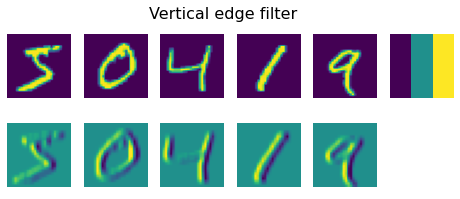

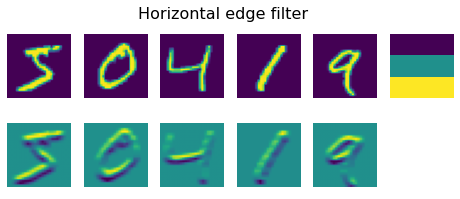

In [6]:
plot_convolution(torch.tensor([[-1.,0.,1.],[-1.,0.,1.],[-1.,0.,1.]]),'Vertical edge filter')
plot_convolution(torch.tensor([[-1.,-1.,-1.],[0.,0.,0.],[1.,1.,1.]]),'Horizontal edge filter')

첫 번째 필터는 **vertical edge filter**이며 다음 행렬로 정의됩니다.
$$
\left(
    \begin{matrix}
     -1 & 0 & 1 \cr
     -1 & 0 & 1 \cr
     -1 & 0 & 1 \cr
    \end{matrix}
\right)
$$

이 필터가 상대적으로 균일한 픽셀 영역에서 동작하면 모든 값의 합계는 0이 됩니다. 그러나 이미지에서 수직 경계를 만나면 주변보다 차이가 큰 값이 생성됩니다. 이것이 높고 낮은 값으로 표현되는 수직 경계를 볼 수 있는 반면 수평 경계는 평균으로 주변과 차이가 작아지는 이유입니다.

수평 경계 필터를 적용하면 반대 상황이 일어납니다. 수평선이 강조되고, 수직선은 약해집니다.

전통적인 컴퓨터 비전에서는 다양한 필터로 이미지의 특징을 추출하고, 이를 분류기 생성을 위한 머신러닝 알고리즘에 사용했습니다. 그러나 딥러닝에서는 분류 문제를 풀기 위한 최고 성능의 convolutional filter를 학습하는 네트워크를 구성합니다.

이를 위해, convolutional layer를 살펴보겠습니다.

## Covolutional layers
Covolutional layer는 `nn.Conv2d` 구조를 사용하여 정의합니다. 다음 사항을 정해야 합니다.

- 'in_channels' - 입력 채널 수. 예제에서는 흑백 이미지를 다루므로 입력 채널 수는 1입니다.
- 'in_channels' - 사용 필터 수. 우리는 9개의 필터를 사용할 것입니다. 이는    